


# Data Analysis on Adult Smoking Habits in the UK


_Give names and emails of group members here:_

* Sathyasri Sudhakar, mm23ss@leeds.ac.uk
* Priyanka Singh, mm23prs@leeds.ac.uk
* Akshay Deshmukh, mm23avd@leeds.ac.uk
* Omkar Pawar, mm23osp@leeds.ac.uk

# Project Plan

## The Data (10 marks)

In this assignment, we examine the "Adult Smoking Habits in the UK" dataset sourced from the Office for National Statistics (ONS). This dataset provides a comprehensive overview of smoking prevalence and trends among individuals aged 16 and above in the UK, incorporating data from diverse sources such as the Annual Population Survey (APS) and the Opinions and Lifestyle Survey (OPN). The dataset encompasses various facets of smoking habits, including:

* Demographic Information : Includes details on age, gender and geographic location, offering insights into the variations in smoking habits across different groups.
* Smoking Status : Provides information on whether individuals are current, former, or non-smokers, contributing to a nuanced understanding of smoking behaviours.
* Attempting to Quit : Offering insights into individuals who have made efforts to quit smoking and their daily smoking patterns, this data sheds light on the challenges and dynamics of smoking cessation. 
* Trends and Time-related Data : Historical data or trends in the data help us analyse changes in smoking prevalence, smoking habits, and associated factors across different years. 

In addition, we have amalgamated our dataset with others, such as 'E-cigarette use in UK' and 'Smoking habits in UK-by Occupation.' This collaborative approach incorporates recent trends in nicotine consumption and explores additional factors contributing to smoking behaviours, providing a more comprehensive understanding of the landscape.

Analysing adult smoking habits within the United Kingdom presents a complex yet vital endeavour in understanding public health behaviours. With a dataset focused on this issue, exploring the multifaceted dimensions of smoking patterns, prevalence, associated demographics, and potential trends becomes imperative. The UK, like many nations, grapples with the societal and health implications of smoking, making it a crucial subject for investigation. Through comprehensive analysis of this dataset, we aim to unveil insights that could inform targeted interventions, policy formulations, and public health campaigns to reduce smoking prevalence among adults, striving for a healthier and more informed society.



## Project Aim and Objectives (5 marks)

Analyzing the Adult Smoking Habits in the UK dataset encompasses a diverse set of objectives with the goal of understanding smoking behaviours. These objectives include: 
1. Understanding the Prevalence and the Trends of Smoking:
    * Identifying trends or patterns in smoking prevalence across various demographics and geographic areas 
    * To monitor how smoking habits have evolved over time
    * Identifying and understanding trends and correlations between traditional cigarettes and e-cigarettes in recent times
2. Identifying Factors Contributing to Smoking:
    * Revealing correlations between smoking and factors such as age, gender, and socio-economic status
    * To identify the trends and correlations between cigarettes and e-cigarettes in the recent times
    * Investigating individuals ready to quit smoking and examining their smoking behaviours

Overall, the analysis of the Adult Smoking Habits in the UK dataset is a valuable tool for understanding smoking behaviour, its causes and consequences, and for informing effective public health policy and interventions aimed at reducing smoking and promoting a smoke-free society.


### Specific Objective(s)

* __Objective 1:__ _Investigating the prevalence of smokers across different counties in the United Kingdom_
* __Objective 2:__ _Examining smokers in the UK based on their age, gender and occupation_
* __Objective 3:__ _Exploring the association between intention to quit smoking and the time of first cigarette of the day_
* __Objective 4:__ _Exploring Trends in Tobacco Consumption: An Analysis of Cigarette and E-Cigarette Users_

## System Design (5 marks)

### Architecture
![image](diagram.png)
* __Step 1__ - Sourcing Data : The data on Adult Smoking Habits in the UK was obtained from the Office of National Statistics. 
* __Step 2__ - Data Quality Check : In this step, we examine the data for missing values, errors, and overall legitimacy to ensure its integrity.
* __Step 3__ - Understanding Data : This involves gaining clarity on the objectives of the analysis and determining the specific actions needed to be taken with the data. 
* __Step 4__ - Data Transformation : Transforming the data based on our objectives, which may include removing values, organizing the data, normalising the data and creating pivot tables. 
* __Step 5__ - Data Exploration : Conducting an exploration of the data to uncover patterns and trends.  
* __Step 6__ - Result : Utilizing graphical visualizations to illustrate and interpret the results of our exploration objectives effectively.

  
### Processing Modules and Algorithms

* _Converting the shape file (.shp) consisting of the boundaries for every county in the United Kingdom and adding their polygon geographic locations to a pandas dataframe using a library called geopandas. Merged this dataframe into the smokerspercentage dataset using the key ‘Local Authorities’ resulting to a dataframe with all values._
* _Eliminating outliers and focusing solely on weighted data from the year 2000 onward. Unweighted data predating 2000 is excluded._
* _Merging our primary dataset, "Adult Smoking Habits in the UK," with additional datasets on smoking based on occupation and data on e-cigarette usage in the UK._
* _Condensing the extensive datasets into compact pivot tables for comprehension._



# Program Code (15 marks)


### Importing the required libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

### Code Cells for Objective 1

#### Map based visualisation to represent the percentage of current smokers in different UK counties

Importing the dataset for the map based visualisation

In [3]:
map_df = pd.read_csv('D:/Programming for Data Science/Coursework3/2022.csv')
map_df.head()

,Unnamed: 0.1,Unnamed: 0,Region Name,Local Authority Code,Local Authority Name,Estimated proportion of current smokers %,Latitude_LA,Longitude_LA,Latitude_RN,Longitude_RN,color
0,0,10,North East,E06000002,Middlesbrough,15.7,54.576042,-1.234405,54.731411,-1.791981,#91c800ff
1,1,11,North East,E06000003,Redcar and Cleveland,17.1,54.567906,-1.005496,54.731411,-1.791981,#f0f800ff
2,2,12,North East,E06000004,Stockton-on-Tees,13.0,54.564094,-1.312916,54.731411,-1.791981,#198d21ff
3,3,13,North East,E06000005,Darlington,13.8,54.524208,-1.555581,54.731411,-1.791981,#108800ff
4,4,14,North East,E06000047,County Durham,16.5,54.666667,-1.750000,54.731411,-1.791981,#c7e300ff


Importing boundaries of the UK counties from a Shape file (.shp)

In [6]:
shapes = gpd.read_file('C:/Users/ASUS/Downloads/Local_Authority_Districts_May_2023_UK_BFC_V2_5362653233160241314/LAD_MAY_2023_UK_BFC_V2.shp')

Converting the shapes variable to a pandas dataframe

In [7]:
shapes_pd = pd.DataFrame(shapes)
shapes_pd.columns = ['Local Authority Code','LAD23NM' , 'LAD23NMW', 'BNG_E','BNG_N','LONG','LAT','GlobalID','geometry']
merged = pd.merge(shapes_pd ,map_df , on='Local Authority Code')
merged.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
merged.head(2)

,Local Authority Code,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Region Name,Local Authority Name,Estimated proportion of current smokers %,Latitude_LA,Longitude_LA,Latitude_RN,Longitude_RN,color
0,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,43ccae4f-588f-4f71-b28f-905ae3e9426a,"MULTIPOLYGON (((446854.700 517192.700, 446854....",North East,Middlesbrough,15.7,54.576042,-1.234405,54.731411,-1.791981,#91c800ff
1,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,c215a44f-108d-4394-bb75-b3ffc6c6e9d1,"MULTIPOLYGON (((451747.397 520561.100, 451792....",North East,Redcar and Cleveland,17.1,54.567906,-1.005496,54.731411,-1.791981,#f0f800ff


### Code Cells for Objective 2 
#### Relation between the number of smokers and non-smokers based in Great Britain

Importing the required datasets

In [3]:
xls = pd.ExcelFile('adultsmokinghabitsingreatbritain.xlsx')
df1 = pd.read_excel(xls, 'Table_1')# Smokers 
df2 = pd.read_excel(xls, 'Table_2')# Non - Smokers 
df3 = pd.read_excel(xls, 'Based_on_Occupation')

Dropping rows from the dataframe since we are specifically dealing with information from the year 2000 onward

In [4]:
df1.drop(df1.tail(18).index,inplace = True)# as we are not working with the data before 2000
df2.drop(df2.tail(18).index,inplace=True)# as we are not working with the data before 2000 in the non smokers dataset 

Calculating the Weighted Average Sum for men and women for plot of smoking habits based on gender

In [5]:
df1['Weighted_Avg_Sum_of_Men']=df1.iloc[:,2:8].mean(axis=1)# Making a new column for the total weighted sum of men - smokers
df1['Weighted_Avg_Sum_of_Women']=df1.iloc[:,8:14].mean(axis=1)# Making a new column for the total weighted sum of women - Smokers 
df2['Weighted_Avg_Sum_of_Men']=df2.iloc[:,2:8].mean(axis=1)# Making a new column for the total weighted sum of men - non-smokers
df2['Weighted_Avg_Sum_of_Women']=df2.iloc[:,8:14].mean(axis=1)# Making a new column for the total weighted sum of men - non-smokers

Concatenating different columns from the Smokers and Non-Smokers dataset to create a new dataframe for easy plotting 

Based on Gender:

In [8]:
comp_btw_gender=pd.concat([df1['Year'],df1['Weighted_Avg_Sum_of_Men'],df1['Weighted_Avg_Sum_of_Women'],
                           df2['Weighted_Avg_Sum_of_Men'],df2['Weighted_Avg_Sum_of_Women']],axis=1, 
                          keys=['Year','Smokers-Men','Smokers-Women', 'Non-Smokers-Men','Non-Smokers-Women'])
comp_btw_gender.head()

,Year,Smokers-Men,Smokers-Women,Non-Smokers-Men,Non-Smokers-Women
0,2022,12.800000,10.600000,62.583333,68.483333
1,2021,14.233333,12.400000,60.800000,66.450000
2,2020,15.750000,14.383333,59.183333,64.266667
3,2019,18.766667,14.566667,56.750000,62.500000
4,2018,17.950000,16.816667,55.666667,61.666667


Based on Age:

In [24]:
comp_btw_age=pd.concat([df1['Year'],df1['16 to 24 - S'],df1['25 to 34 - S'],df1['35 to 49 - S'], df1['50 to 59 - S'],
                        df1['60 and Over - S'], df2['16 to 24 - NS'],df2['25 to 34 - NS'],df2['35 to 49 - NS'],
                        df2['50 to 59 - NS'],df2['60 and Over - NS']],axis=1, 
                        keys=['Year',"Smokers aged 16-24","Smokers aged 25-34","Smokers aged 35-49","Smokers aged 50-59",
                              "Smokers aged 60 and Over",'Non_Smokers aged 16-24','Non_Smokers aged 25-34','Non_Smokers aged 35-49',
                              'Non_Smokers aged 50-59','Non_Smokers aged 60 and Over'])
comp_btw_age.head()


,Year,Smokers aged 16-24,Smokers aged 25-34,Smokers aged 35-49,Smokers aged 50-59,Smokers aged 60 and Over,Non_Smokers aged 16-24,Non_Smokers aged 25-34,Non_Smokers aged 35-49,Non_Smokers aged 50-59,Non_Smokers aged 60 and Over
0,2022,10.5,13.8,11.8,14.9,7.9,86,72.2,63.2,55,54
1,2021,13.1,16.8,14.8,14.8,7.7,82.9,67.3,60.3,56.3,53.9
2,2020,15.2,18.1,16.9,16.3,9.4,80.3,66.4,57.9,54.6,52
3,2019,18.3,21.8,16.5,18.4,9.5,77.7,62.3,56,53.3,51.1
4,2018,23.6,20.8,18.6,15.2,10.2,72.1,63.6,54.5,53.3,51.4


### Code Cells for Objective 3 
#### Association between intention to quit cigarettes and the time of first cigarette of the day

Importing the required dataset

In [11]:
df = pd.read_csv("Intention to quit smoking.csv")

Grouping the data by year

In [12]:
df_year = df.iloc[:,[0,2,3,4,5]]
df_year.groupby(by = "Year").sum()

,Not intending to quit,Wants to quit but no time frame,Intending to quit in the next 3 months,Don't know either way
Year,,,,
2015,100.0,100.1,100.0,100.0
2016,100.1,100.0,100.0,100.0
2017,100.0,100.0,100.0,100.0
2018,100.0,100.0,100.0,100.0
2019,100.0,100.1,100.0,100.0
2020,100.0,100.0,100.0,100.0
2021,100.0,100.0,100.0,99.9
2022,100.0,100.0,100.0,100.0


Creating a Pivot table to help analyse annual data on time of first cigarette consumption of the day

In [13]:
df_not_intending_to_quit = df.iloc[:,[0,1,2]]
df_not_intending_to_quit = df_not_intending_to_quit.pivot(index='Year', columns='Time to first cigarette of the day after waking', values='Not intending to quit')
df_not_intending_to_quit.reset_index(inplace= True)
df_not_intending_to_quit = df_not_intending_to_quit[['Year', 'In first 29 minutes',  '30 minutes to 1 hour','Over 1 hour']]
df_not_intending_to_quit

Time to first cigarette of the day after waking,Year,In first 29 minutes,30 minutes to 1 hour,Over 1 hour
0,2015,43.4,17.2,39.4
1,2016,50.0,17.0,33.1
2,2017,51.5,15.1,33.4
3,2018,44.9,12.0,43.1
4,2019,49.2,11.2,39.6
5,2020,64.9,9.6,25.5
6,2021,57.1,9.4,33.5
7,2022,68.5,13.8,17.7


Creating a Pivot table for proportion of people aiming to quit without specifying a timeframe

In [14]:
df_wants_to_quit_but_no_timeframe = df.iloc[:,[0,1,3]]
df_wants_to_quit_but_no_timeframe = df_wants_to_quit_but_no_timeframe.pivot(index='Year', columns='Time to first cigarette of the day after waking', values='Wants to quit but no time frame')
df_wants_to_quit_but_no_timeframe.reset_index(inplace= True)
df_wants_to_quit_but_no_timeframe = df_wants_to_quit_but_no_timeframe[['Year', 'In first 29 minutes',  '30 minutes to 1 hour','Over 1 hour']]
df_wants_to_quit_but_no_timeframe

Time to first cigarette of the day after waking,Year,In first 29 minutes,30 minutes to 1 hour,Over 1 hour
0,2015,40.7,19.6,39.8
1,2016,43.7,21.0,35.3
2,2017,39.9,20.8,39.3
3,2018,35.4,19.2,45.4
4,2019,46.6,19.8,33.7
5,2020,44.4,19.9,35.7
6,2021,47.0,11.6,41.4
7,2022,64.6,8.8,26.6


Creating a Pivot table to examine proportion of people aiming to quit in the next 3 months

In [15]:
df_intending_to_quit_in_next_3_months = df.iloc[:,[0,1,4]]
df_intending_to_quit_in_next_3_months = df_intending_to_quit_in_next_3_months.pivot(index='Year', columns='Time to first cigarette of the day after waking', values='Intending to quit in the next 3 months')
df_intending_to_quit_in_next_3_months.reset_index(inplace= True)
df_intending_to_quit_in_next_3_months = df_intending_to_quit_in_next_3_months[['Year', 'In first 29 minutes',  '30 minutes to 1 hour','Over 1 hour']]
df_intending_to_quit_in_next_3_months

Time to first cigarette of the day after waking,Year,In first 29 minutes,30 minutes to 1 hour,Over 1 hour
0,2015,37.9,17.5,44.6
1,2016,35.7,13.7,50.6
2,2017,38.6,19.7,41.7
3,2018,30.2,20.4,49.4
4,2019,27.9,16.0,56.1
5,2020,37.6,14.0,48.4
6,2021,34.6,12.6,52.8
7,2022,30.3,17.7,52.0


### Code Cells for Objective 4

#### Exploring Trends in Tobacco Consumption: An Analysis of Cigarette and E-Cigarette Users

Importing the required datasets

In [54]:
ecigs = pd.read_excel("CW3_data.xlsx",sheet_name="Ecigs")
col = ['Statistic','Year','Men_Aged_16-24','Men_Aged_25-34','Men_Aged_35_49','Men_Aged_50_59','Men_Aged_60_and_over',
       'Men_Aged_16_and_over','Women_Aged_16-24','Women_Aged_25-34','Women_Aged_35_49','Women_Aged_50_59',
       'Women_Aged_60_and_over','Women_Aged_16_and_over','All_person_Aged_16-24','All_person_Aged_25-34',
       'All_person_Aged_35_49','All_person_Aged_50_59','All_person_Aged_60_and_over','All_person_Aged_16_and_over']
smoking_data = pd.read_excel("CW3_data.xlsx",sheet_name="Smoking",nrows=37)
smoking_wb = pd.read_excel("CW3_data.xlsx",sheet_name="Smoking",skiprows=range(0, 40-1), nrows=42-40+1)
smoking_data.columns=col
smoking_wb.columns=col
smoking_wb

,Statistic,Year,Men_Aged_16-24,Men_Aged_25-34,Men_Aged_35_49,Men_Aged_50_59,Men_Aged_60_and_over,Men_Aged_16_and_over,Women_Aged_16-24,Women_Aged_25-34,Women_Aged_35_49,Women_Aged_50_59,Women_Aged_60_and_over,Women_Aged_16_and_over,All_person_Aged_16-24,All_person_Aged_25-34,All_person_Aged_35_49,All_person_Aged_50_59,All_person_Aged_60_and_over,All_person_Aged_16_and_over
0,Weighted base (in thousands),2022,3407,4337,5958,4156,7773,25630,3259,4269,6127,4208,8809,26672,6665,8607,12085,8363,16582,52302
1,Unweighted sample,2022,1651,2282,4105,3974,16962,1651,2110,3253,5346,4780,19864,2282,1651,2282,4105,3974,16962,1651


Normalising population data for e-cigarette users

In [55]:
ecigs = ecigs.drop(columns=[ecigs.columns[0], ecigs.columns[1]])

weighted_ecigs = pd.DataFrame()
for start_row in range(0, len(ecigs), 6):
    multiplied_rows = ecigs.iloc[start_row].multiply(ecigs.iloc[start_row + 4])
    weighted_ecigs = pd.concat([weighted_ecigs, multiplied_rows.to_frame().T], ignore_index=True)
col1 = ['Men_Aged_16-24','Men_Aged_25-34','Men_Aged_35_49','Men_Aged_50_59','Men_Aged_60_and_over',
       'Men_Aged_16_and_over','Women_Aged_16-24','Women_Aged_25-34','Women_Aged_35_49','Women_Aged_50_59',
       'Women_Aged_60_and_over','Women_Aged_16_and_over','All_person_Aged_16-24','All_person_Aged_25-34',
       'All_person_Aged_35_49','All_person_Aged_50_59','All_person_Aged_60_and_over','All_person_Aged_16_and_over']
weighted_ecigs = weighted_ecigs.iloc[::-1]
Years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
weighted_ecigs = weighted_ecigs.set_index(pd.Index(Years))
weighted_ecigs.columns=col1
weighted_ecigs

,Men_Aged_16-24,Men_Aged_25-34,Men_Aged_35_49,Men_Aged_50_59,Men_Aged_60_and_over,Men_Aged_16_and_over,Women_Aged_16-24,Women_Aged_25-34,Women_Aged_35_49,Women_Aged_50_59,Women_Aged_60_and_over,Women_Aged_16_and_over,All_person_Aged_16-24,All_person_Aged_25-34,All_person_Aged_35_49,All_person_Aged_50_59,All_person_Aged_60_and_over,All_person_Aged_16_and_over
2014,3460.0,22705.2,43561.0,12913.2,14429.8,97304.0,6414.4,22728.6,27343.7,13924.8,15266.0,86513.0,9570.4,45012.9,70459.2,26831.0,29805.3,184149.0
2015,14344.0,24986.5,36478.0,18505.8,17849.0,113574.0,5545.6,24316.2,42078.4,23074.2,19230.0,113898.4,19745.6,49305.8,79092.0,41485.0,37850.8,227592.0
2016,22775.1,36044.4,45058.6,22971.2,20604.0,156926.7,8910.2,23688.5,41191.6,32670.0,21940.8,127757.7,40524.6,59326.2,86882.7,54977.0,42641.6,285504.8
2017,26752.0,40380.6,51884.0,24219.3,19224.8,163033.0,10416.0,22938.4,39582.9,22027.2,26327.4,120455.6,37152.0,63291.0,173071.2,45819.0,46016.4,281974.0
2018,26465.4,41691.9,69461.1,30715.2,24314.5,194317.2,3140.5,22663.4,35858.7,27190.8,40998.9,131615.0,29990.4,65135.0,105723.0,58357.6,65938.4,324821.7
2019,12083.2,30907.8,53140.2,29264.4,28097.2,154519.1,10373.4,48058.5,33393.6,30757.5,20474.4,142797.6,22529.1,79037.2,86855.4,60591.4,47775.0,295117.5
2020,14013.8,20060.6,42238.0,27713.4,15798.3,120009.8,4905.6,19756.0,17637.8,21324.8,16302.0,79707.0,18803.6,39825.0,60580.0,48735.0,32206.0,197991.4
2021,18319.2,47109.7,45406.9,21952.6,32995.2,164198.4,6224.4,22874.4,22959.6,25235.8,15768.0,93327.5,24728.4,69761.5,68052.3,47560.8,48186.4,256372.9
2022,12578.4,31590.6,48790.0,31087.4,28641.7,153930.0,22525.4,25947.0,30115.4,20614.3,19349.0,117458.0,34965.6,57480.4,78630.5,51282.7,47954.4,272220.0


Normalising population data for cigarette users

In [56]:
smoking_data = smoking_data.drop(smoking_data.columns[[0, 1]], axis=1).head(1)
smoking_data = smoking_data.set_index(pd.Index(["2022"]))
smoking_wb = smoking_wb.drop(smoking_wb.columns[[0, 1]], axis=1)
weighted_smoking = smoking_data.copy()
weighted_smoking= smoking_data[:].mul(smoking_wb.iloc[0,:], axis=1)
weighted_smoking

,Men_Aged_16-24,Men_Aged_25-34,Men_Aged_35_49,Men_Aged_50_59,Men_Aged_60_and_over,Men_Aged_16_and_over,Women_Aged_16-24,Women_Aged_25-34,Women_Aged_35_49,Women_Aged_50_59,Women_Aged_60_and_over,Women_Aged_16_and_over,All_person_Aged_16-24,All_person_Aged_25-34,All_person_Aged_35_49,All_person_Aged_50_59,All_person_Aged_60_and_over,All_person_Aged_16_and_over
2022,33729.3,62452.8,81624.6,71898.8,69957.0,320375.0,35849.0,56777.7,61270.0,52600.0,59901.2,266720.0,69982.5,118776.6,142603.0,124608.7,130997.8,585782.4


Dataframe comparing number of Cigarette vs E-cigarette users for year 2022

In [57]:
merged_df = pd.concat([weighted_smoking, weighted_ecigs.head(1)], axis=0, ignore_index=True)
selected_columns = merged_df.iloc[:, [5, 11, 17]]
com_df = selected_columns.transpose()
com_df.columns = ['Cigarette Smokers','E-cigarette Users']
com_df

,Cigarette Smokers,E-cigarette Users
Men_Aged_16_and_over,320375.0,97304.0
Women_Aged_16_and_over,266720.0,86513.0
All_person_Aged_16_and_over,585782.4,184149.0


# Project Outcome (10 + 10 marks)

## Overview of Results
Examining the Adult Smoking Habits in the UK dataset reveals a consistent decline in smoking prevalence over the years. This decline can be attributed to heightened awareness of the health risks associated with smoking, the implementation of government policies such as smoking bans, and increases in cigarette taxes. While these positive trends are observed, smoking remains a significant public health concern and stands as the leading cause of preventable deaths in the UK. Disparities persist, with higher prevalence among men and those in routine and manual occupations, as indicated in the data, while e-cigarettes gain popularity among younger age groups and women. Further insights highlight critical aspects of smoking behavior, emphasizing the importance of the timing of the first cigarette as a potential indicator of readiness to quit.

## Objective 1
### Investigating the prevalence of smokers across different counties in the United Kingdom
### Interpretation of results:

Based in the Choropleth map, the estimated number of smokers in the UK varies greatly by region. The highest proportion of smokers is found in the North East, while the lowest proportion is found in the South East.

A possible explanation is that there are cultural differences between the regions. Smoking has been more common in the North of UK than in the South for many years. This may be due to historical factors, such as the fact that the North was once home to a large number of heavy industries, where smoking was common among workers.

It is important to note that the graph only shows the estimated proportion of current smokers in each region. It does not show the number of people who have smoked in the past or who are trying to quit.

Overall, the graph suggests that there are significant regional variations in smoking rates in the UK. The highest proportions of smokers are found in the South of Scotland, North East and North West of England, North of nothern Ireland, while the lowest proportions of smokers are found in the South East of UK.
### Visualisation:

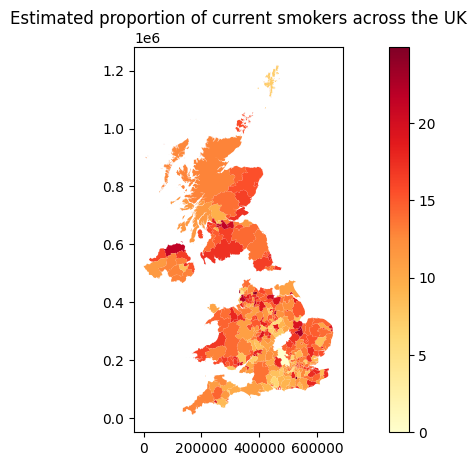

In [8]:
gdf = gpd.GeoDataFrame(merged, geometry='geometry')
# Plot the GeoDataFrame
gdf.plot(column='Estimated proportion of current smokers %', cmap='YlOrRd', legend=True, figsize=(12, 5))
plt.title('Estimated proportion of current smokers across the UK')
plt.show()

## Objective 2
###  Examining smokers in the UK based on their age, gender and occupation

### Interpretation of results:
1. *_Total Proportion of Smokers and Non-Smokers_* - The data shows that number of smokers has been steadily declining over the years while the number of non-smokers has been increasing. This trend suggests that there has been a growing awareness of the dangers of smoking and a greater willingness among people to quit or avoid smoking altogether. This positive shift in attitudes and behaviors is likely due to multiple factors, including public health campaigns, smoking restrictions, and increasing knowledge about the health risks associated with smoking.
2. *_Based on Gender_* - Although there is a higher prevalence of smoking among men compared to women, both genders have demonstrated a decline in smoking rates. If current trends continue, we can expect smoking rates to decline further in the coming years, which would further contribute to improved public health and reduced healthcare costs associated with smoking-related illnesses.
3. *_Based on Age_* - The chart indicates a decline in the number of smokers across all age groups, with the most significant decrease observed among the younger age brackets, namely 16 to 24 and 25 to 34. Meanwhile, the number of smokers in the 50 to 59 age group has remained relatively constant.
4. *_Based on Occupation_* - Individuals employed in routine and manual occupations tend to exhibit higher smoking rates compared to those in other occupations. Routine and manual occupations often involve higher levels of physical stress, repetitive tasks, and limited control over work schedules. These factors may contribute to stress-related smoking as a coping mechanism or form of relaxation.

### Visualisations:

#### Proportion of Smokers and Non - Smokers over the years

<Axes: title={'center': 'Proportion of Smokers and Non-Smokers across the Years'}, xlabel='Year', ylabel='Weighted sum of number of people'>

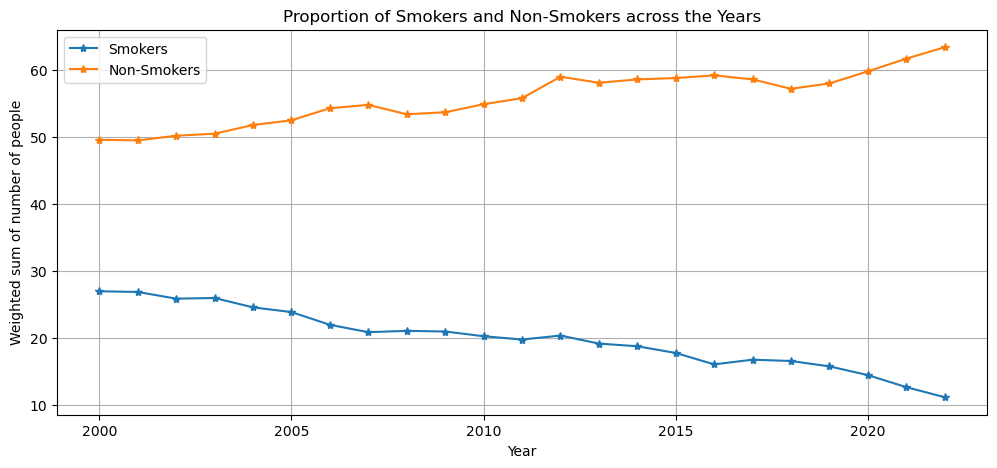

In [20]:
comp_btw_the_two=pd.concat([df1['Year'],df1['Total Count'], df2['Total Count']], axis=1, keys=['Year','Smokers', 'Non-Smokers'])
comp_btw_the_two.plot(x="Year", y=["Smokers", "Non-Smokers"],kind="line", figsize=(12, 5),grid=True, style="*-",
                     xlabel="Year",ylabel="Weighted sum of number of people", title="Proportion of Smokers and Non-Smokers across the Years")

#### Based on Gender

<Axes: title={'center': 'Proportion of Smokers and Non-Smokers by Gender'}, xlabel='Year', ylabel='Weighted avg sum of number of people'>

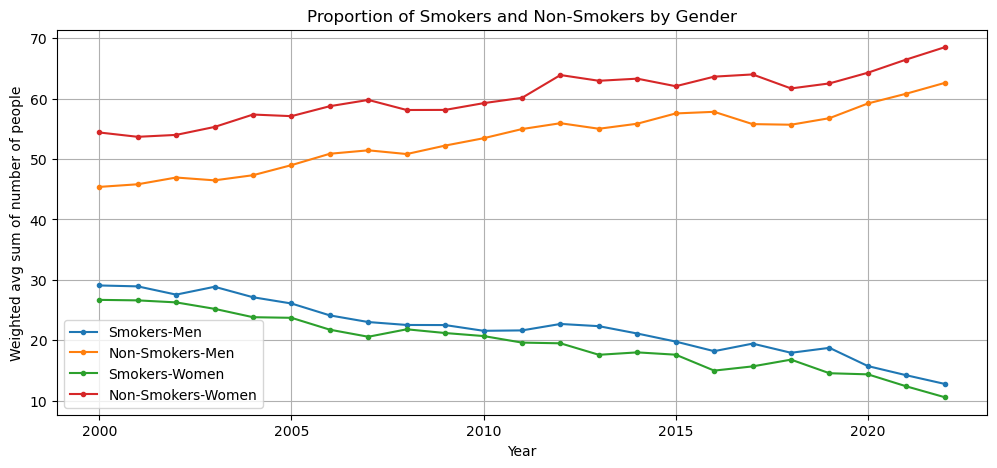

In [21]:
comp_btw_gender.plot(x="Year", y=["Smokers-Men", "Non-Smokers-Men","Smokers-Women","Non-Smokers-Women"],style=".-", figsize=(12, 5),grid=True,
                     xlabel="Year",ylabel="Weighted avg sum of number of people", title="Proportion of Smokers and Non-Smokers by Gender")

#### Based on Age

<Axes: title={'center': 'Proportion of Smokers and Non-Smokers by Age'}, xlabel='Year', ylabel='Weighted average of number of people'>

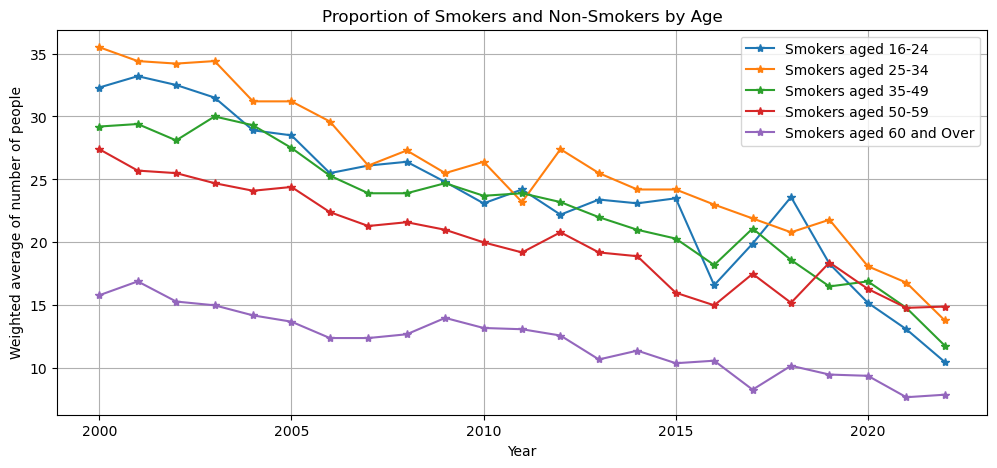

In [25]:
comp_btw_age.plot(x="Year", y=["Smokers aged 16-24","Smokers aged 25-34","Smokers aged 35-49","Smokers aged 50-59","Smokers aged 60 and Over"],kind="line",style="*-" ,figsize=(12, 5),grid=True,
                     xlabel="Year",ylabel="Weighted average of number of people", title="Proportion of Smokers and Non-Smokers by Age")

#### Based on Occupation

<Axes: title={'center': 'Proportion of Smokers and Non-Smokers by Occupation'}, xlabel='Year', ylabel='Weighted Sum of the Number of people'>

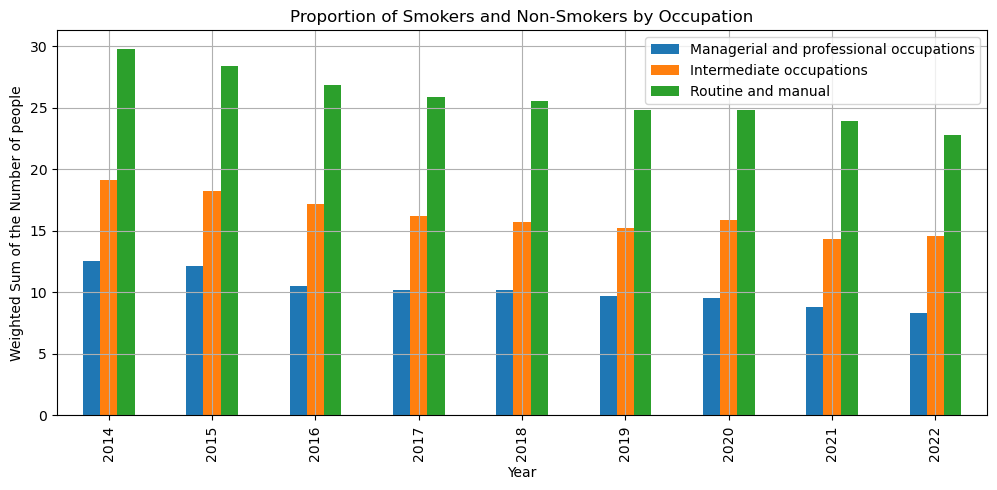

In [26]:
df3.plot(x="Year", y=["Managerial and professional occupations", "Intermediate occupations","Routine and manual"],style="*-",kind="bar", figsize=(12, 5),grid=True,
                     xlabel="Year",ylabel="Weighted Sum of the Number of people", 
            title="Proportion of Smokers and Non-Smokers by Occupation")

## Objective 3

### Exploring the association between intention to quit smoking and the time of first cigarette of the day

### Interpretation of results:
1. When analyzing the trends across different years in the graphs, several notable patterns emerge:
    * Time of First Cigarette: A consistent trend is observed, indicating that individuals who consume their first cigarette         shortly after waking up are less likely to express an intention to quit smoking. Conversely, those who wait longer before       having their first cigarette tend to exhibit a higher intention to quit.
    * Intention Over Time: The percentage of smokers with an intention to quit within the next 3 months appears to increase in       later years, particularly among those who smoke over 1 hour after waking. This suggests a potential shift in smokers'           behavior or decision-making over time.
    * No Time Frame: The proportion of people who want to quit but have not decided on a timeframe remains significant across         all years, suggesting that while there is a desire to quit, committing to a specific plan is challenging for many. These       graphs could be used in public health research to understand smoking behavior and the effectiveness of smoking cessation       programs over time. They suggest that the timing of the first cigarette might be an indicator of one's readiness to quit       smoking.
2. Among individuals with no intention to quit, there is a rise in the proportion of people smoking within the initial 29 minutes after waking, indicating a heightened addiction level. This trend suggests a tendency for those not intending to quit to intensify their smoking habits over subsequent years.
3. For individuals desiring to quit but without a specific timeframe, there is minimal fluctuation in the proportion of people smoking at various times of the day. This implies a lack of decisive action regarding quitting, as there is neither a notable decrease nor increase in smoking behavior across different timings.
4. Among those intending to quit within the next 3 months, a gradual decrease is observed in the proportion of individuals smoking within the initial 29 minutes after waking. Simultaneously, there is a slight increase in the proportion of people smoking after over 1 hour after waking. This pattern suggests an effort among individuals in this category to reduce immediate dependence on cigarettes upon waking.

### Visualisations:

#### Representation of Intention to quit smoking vs the time of first cigarette of the day

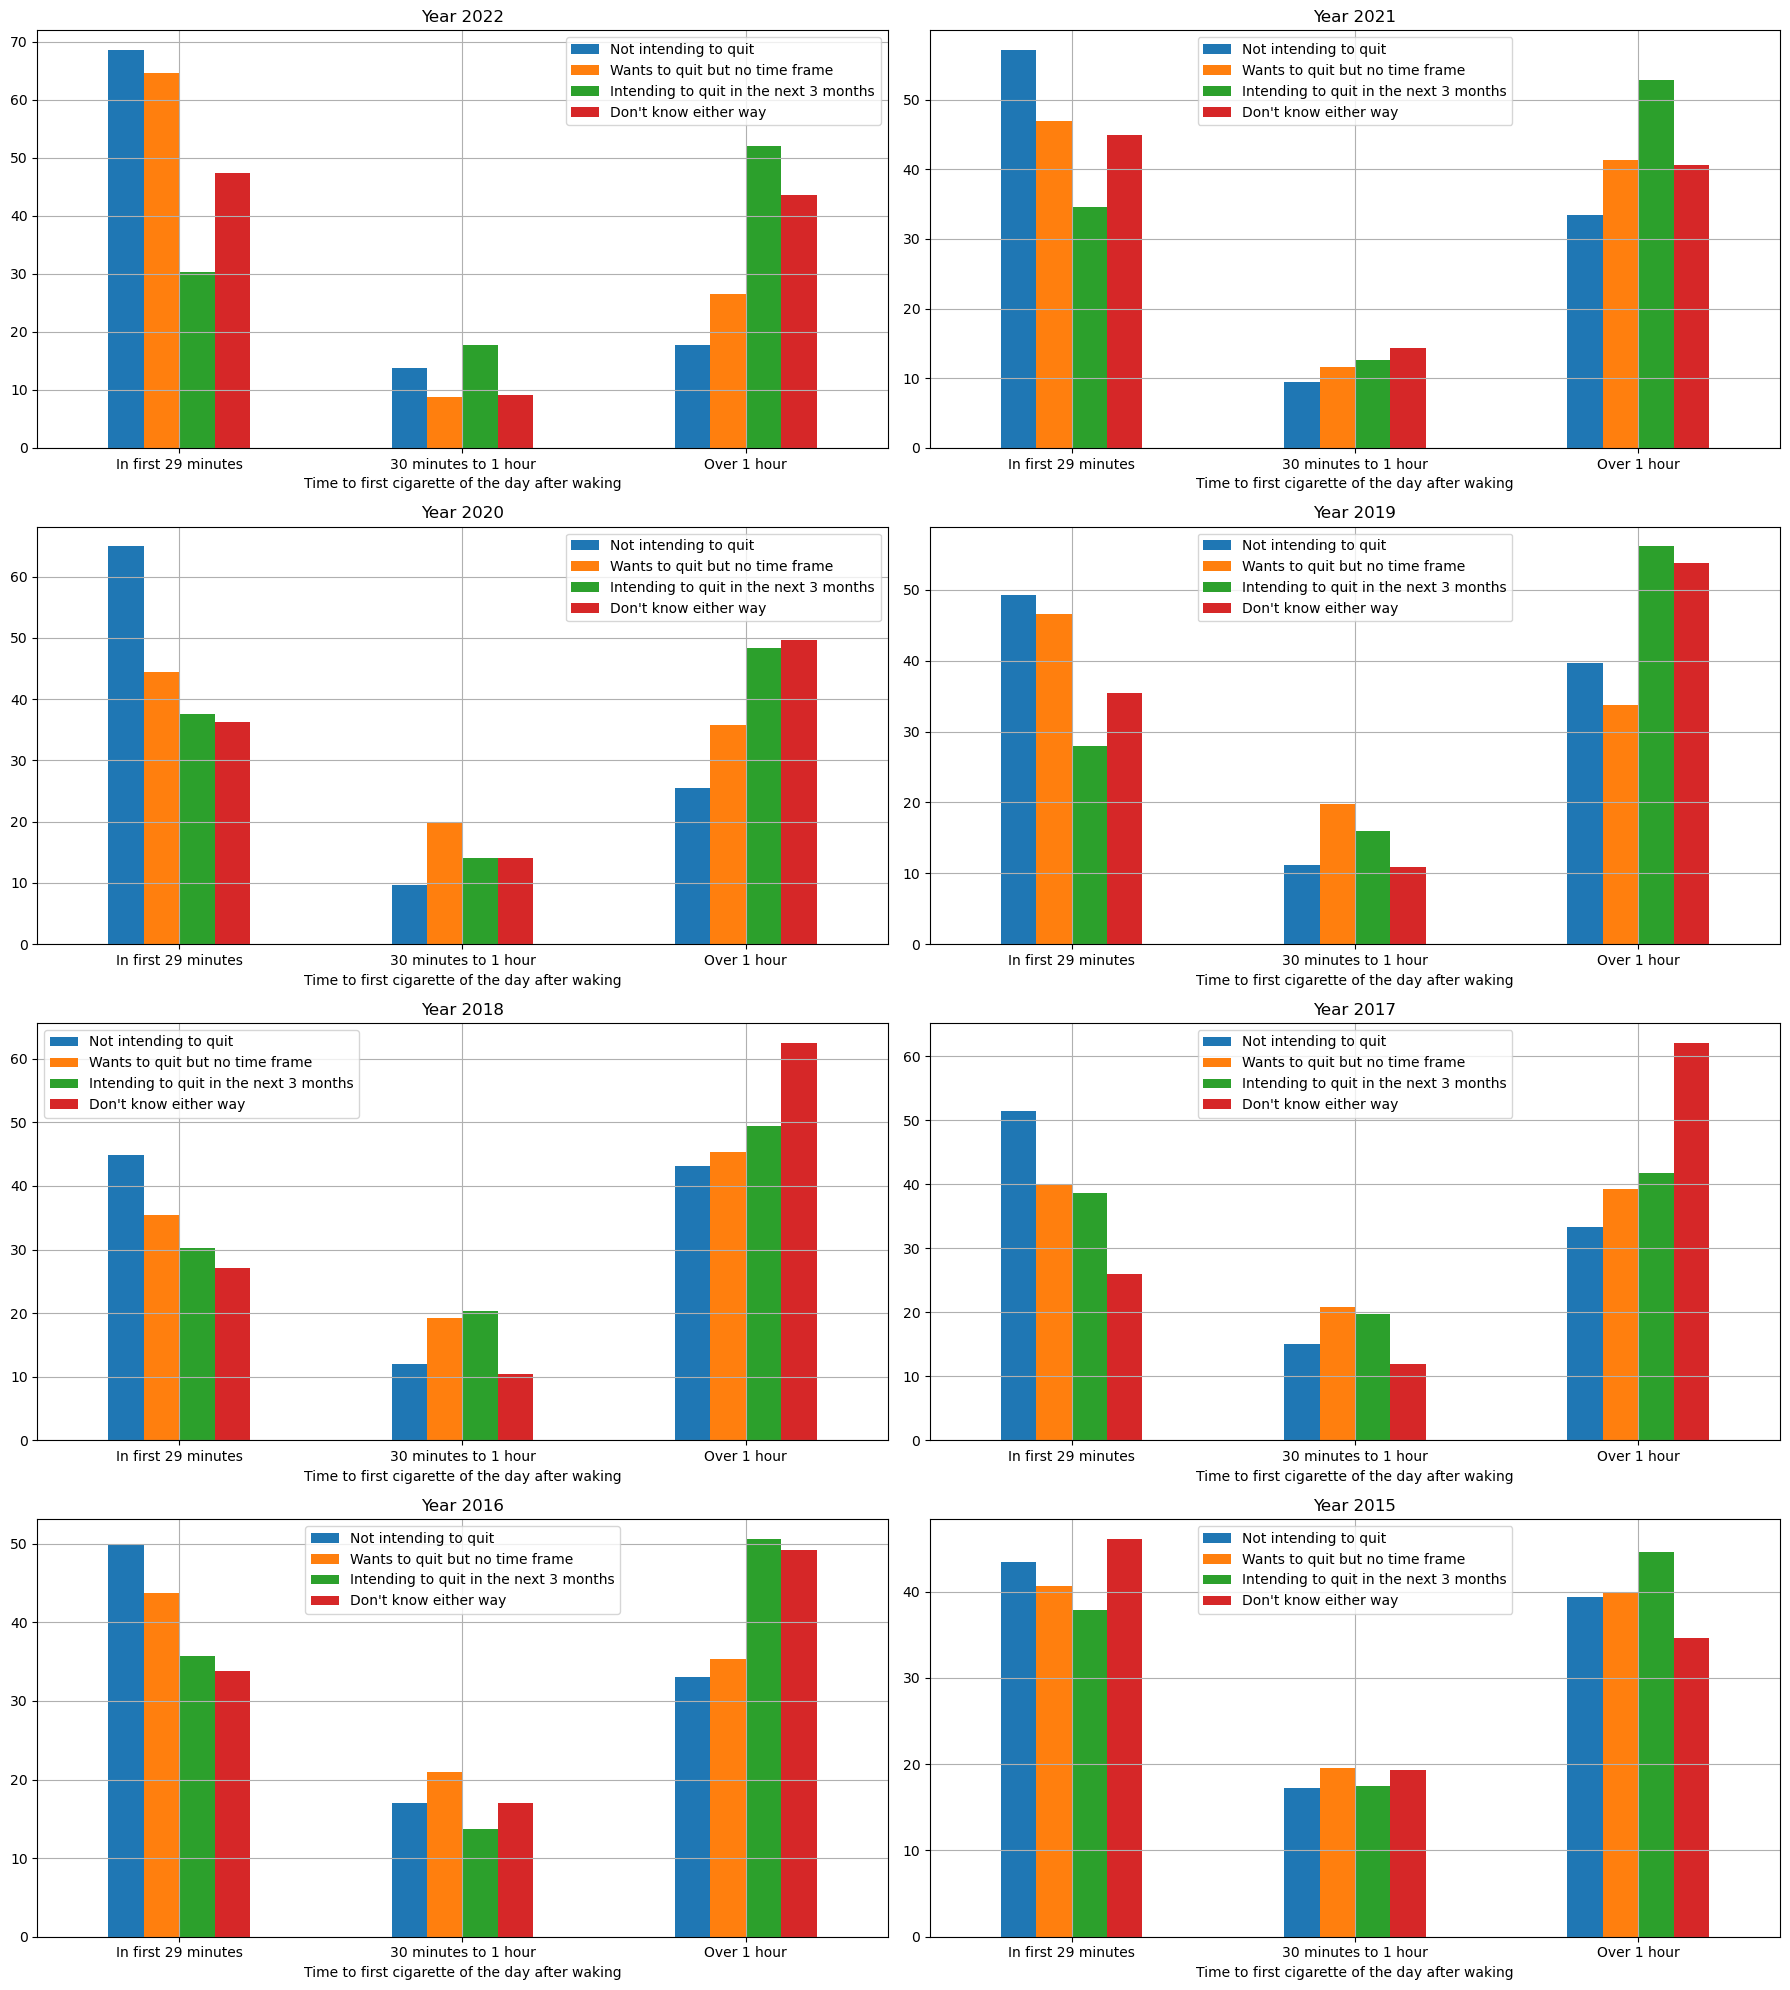

In [29]:
unique_years = df['Year'].unique()
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,20 ))
axs = axs.flatten()
for i, year in enumerate(unique_years):
    temp = df[df['Year'] == year]
    subplot_index = i % 8
    temp.plot(
        x="Time to first cigarette of the day after waking",
        y=["Not intending to quit", "Wants to quit but no time frame", "Intending to quit in the next 3 months", "Don't know either way"],
        kind="bar",
        rot=0,
        ax=axs[subplot_index],
        grid=True
    )
    axs[subplot_index].set_title(f"Year {year}")
plt.tight_layout()
plt.show()

#### Proportion of people not intending to quit

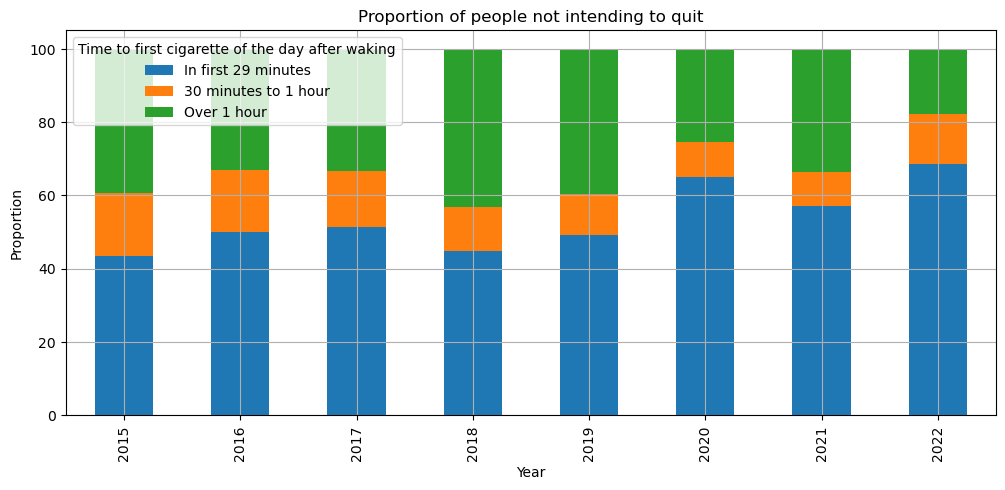

In [30]:
df_not_intending_to_quit.plot(x='Year', kind='bar', stacked=True,
        title='Proportion of people not intending to quit',figsize=(12,5),grid=True)
plt.ylabel("Proportion")
plt.show()

#### Proportion of people intending to quit with no time frame

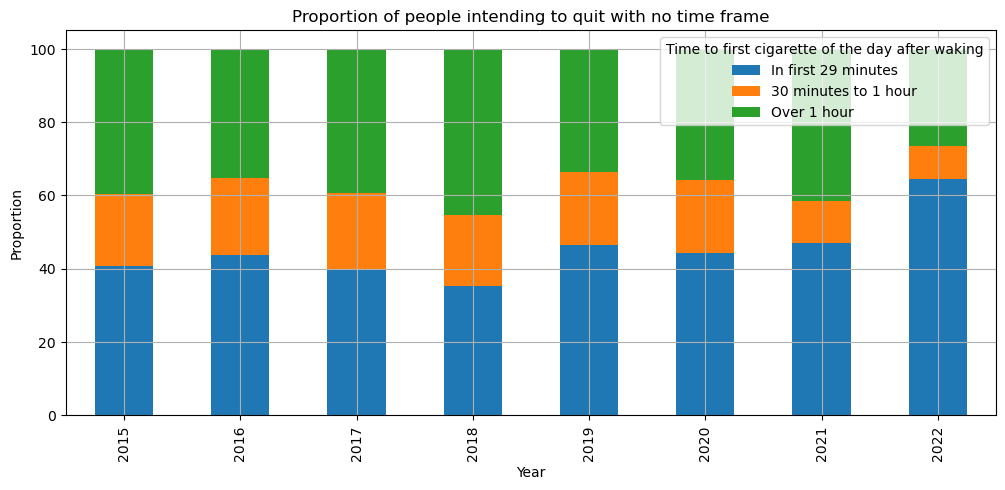

In [31]:
df_wants_to_quit_but_no_timeframe.plot(x='Year', kind='bar', stacked=True,
        title='Proportion of people intending to quit with no time frame',figsize=(12,5),grid=True)
plt.ylabel("Proportion")
plt.show()

#### Proportion of people intending to quit in the next 3 months

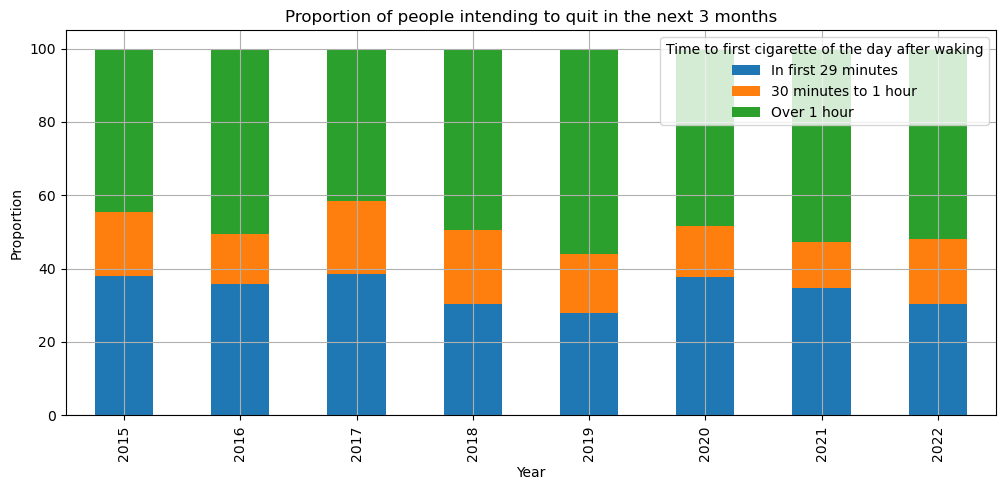

In [32]:
df_intending_to_quit_in_next_3_months.plot(x='Year', kind='bar', stacked=True,
        title='Proportion of people intending to quit in the next 3 months',figsize=(12,5),grid=True)
plt.ylabel("Proportion")
plt.show()

## Objective 4 
### Exploring Trends in Tobacco Consumption: An Analysis of Cigarette and E-Cigarette Users

### Interpretation of results:
1. Comparison of Cigarette and E-Cigarette Users in 2022 - Cigarette smoking is more prevalent than e-cigarette use across all demographic groups. While men consume more cigarettes than women, it is worth noting that the gender gap in e-cigarette use is less prominent. In general, the data depicted in this graph shows that cigarettes continue to be more popular than e-cigarettes. 
2. Distribution of E-Cigarette Users by Age - The data suggests that E-Cigarette use is most prevalent among middle-aged adults, with a significant proportion of younger adults also using E-Cigarettes. The low percentage of E-Cigarette users among older persons could be attributed to a number of issues, including health concerns and a lack of interest in E-Cigarettes.
3. E-cigarette Users from 2014 to 2022 - The data reveals fluctuations in the number of e-cigarette users for both men and women over the years. The peak in usage for both genders occurred around 2017-2018, likely influenced by the marketing of e-cigarettes as an alternative to traditional cigarettes. However, increased awareness of the negative effects associated with e-cigarettes has contributed to a shift in usage patterns. Although the number of e-cigarette users is consistently higher for men, there is a downward trend in male users and an anticipated increase among female users in the upcoming years.

### Visualisations:

#### Comparing number of Cigarette vs E-cigarette users for year 2022

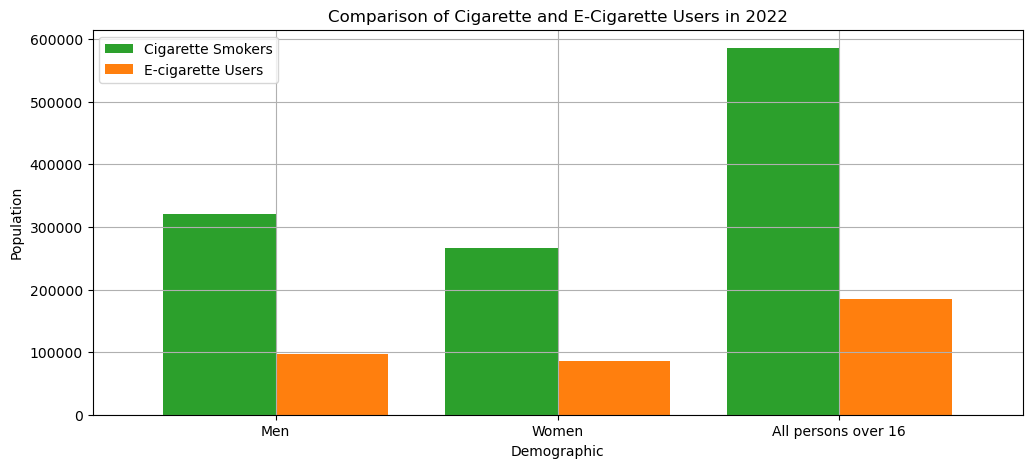

In [58]:
com_df.plot(kind='bar', width=0.8, color=['tab:green','tab:orange'],figsize=(12,5),grid=True)
plt.title('Comparison of Cigarette and E-Cigarette Users in 2022')
plt.xlabel('Demographic')
plt.ylabel('Population')
plt.xticks([0, 1, 2], ['Men', 'Women','All persons over 16'], rotation=0)
plt.legend(loc='upper left')
plt.show()

#### Pie chart showcasing age distribution amongst E-cigarette users

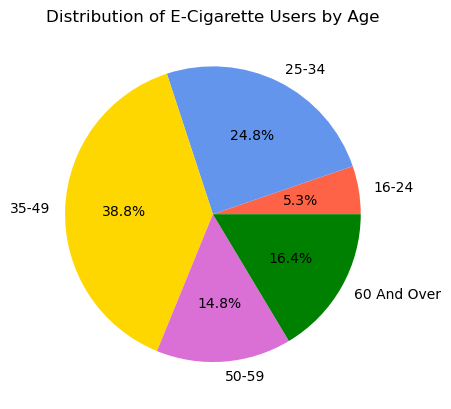

In [59]:
ecigs_age = weighted_ecigs.iloc[0,[12,13,14,15,16]]
plt.pie(ecigs_age, labels=['16-24','25-34','35-49','50-59','60 And Over'], colors = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green'],autopct='%1.1f%%')
plt.title('Distribution of E-Cigarette Users by Age')
plt.show()

#### Visualizing the Evolution of E-Cigarette Users by Gender from 2014 to 2022

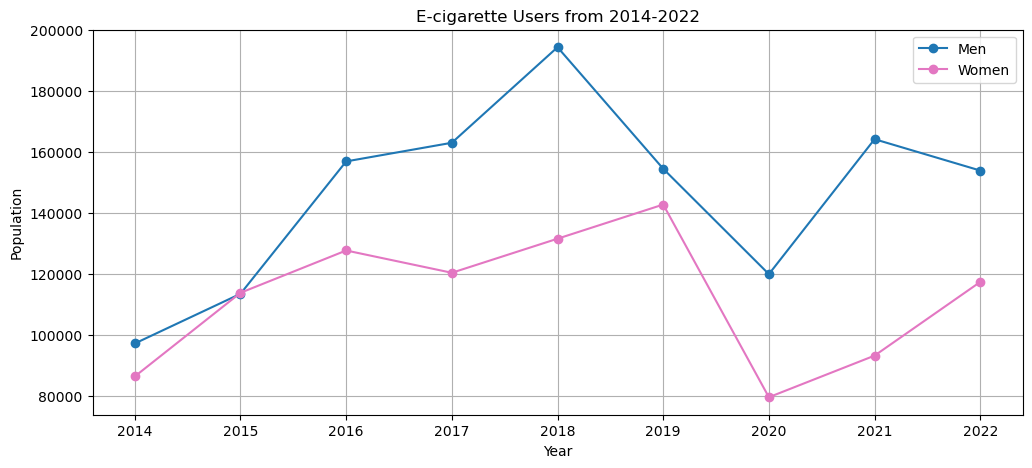

In [61]:
plt.figure(figsize=(12,5))
plt.plot(weighted_ecigs['Men_Aged_16_and_over'], marker='o', linestyle='-', color='tab:blue', label='Men')
plt.plot(weighted_ecigs['Women_Aged_16_and_over'], marker='o', linestyle='-', color='tab:pink', label='Women')
plt.legend()
plt.title('E-cigarette Users from 2014-2022')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()
plt.show()


# Conclusion (5 marks)

### Achievements

Examining the smoking habits of adults in the UK provides valuable insights into the prevalence of smoking. The following accomplishments were made through this analysis:
* We tracked smoking rates over time, allowing us to discern general trends and determine whether smoking rates are on the rise, declining, or remaining stable.
* Through the analysis of data on smoking habits and various factors like age, sex, and occupation, we identified the elements that elevate an individual's risk of becoming a smoker.
* We examined information on individuals attempting to quit smoking, gaining an understanding of their smoking behaviors.
* By delving into data on e-cigarettes, we uncovered emerging trends in nicotine consumption.

### Limitations

There are some limitations to this type of analysis:
* Limited Geographic Data : For certain counties in the UK, there was no information on the proportion of smokers in that region. 
* Self-Reported data : The dataset utilized relies on self-reported information, introducing a potential for individuals to either underreport or overreport their smoking habits. This compromises the accuracy of the estimates to some degree.
* Lack of follow-up Data : The dataset pertaining to smoking habits in the UK lacks follow-up data, making it challenging to monitor and analyze changes in smoking patterns over time, especially for people intending to quite smoking. 


### Future Work

Exploring prospective areas for further research in the analysis of smoking habits in the UK includes:
* Working with more granular data - Gathering data that delves into the reasons behind smoking, identifying triggers, and understanding the influencing factors on smoking behavior would provide a more comprehensive perspective.
* Utilizing Machine Learning Algorithms: Employing machine learning algorithms allows for the identification of nuanced patterns in the data that may not be observed through traditional statistical or visualisation methods. This approach offers a more robust understanding of smoking behavior.
* Applying Insights for Intervention Development: Insights gathered from smoking data analysis can be used to build novel and more effective smoking prevention and cessation programs. By targeting the core causes and triggers of smoking, this proactive strategy strives to improve public health outcomes.